You can access our notebook on colab using this link:  
 [https://colab.research.google.com/drive/1_wO4QH3v81PsLBV6oNBqK9CwxGQ3WOx3?usp=sharing](https://colab.research.google.com/drive/1_wO4QH3v81PsLBV6oNBqK9CwxGQ3WOx3?usp=sharing)

# Importing Libraries

In [1]:
import sklearn
import os
import pandas as pd
import numpy as np

Cloning git repository related to this project. Crawled data and Crawler code are available in git repository.

In [2]:
!git clone https://github.com/tandalalam/saadi-retreival.git

Cloning into 'saadi-retreival'...
remote: Enumerating objects: 602, done.
remote: Counting objects: 100% (602/602), done.
remote: Compressing objects: 100% (594/594), done.
remote: Total 602 (delta 27), reused 563 (delta 5), pack-reused 0
Receiving objects: 100% (602/602), 595.11 KiB | 5.51 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [3]:
os.chdir('saadi-retreival')

Reading Boostan from file:

In [4]:
boostan_data = list()
for chapter_name in os.listdir('boostan'):
    for file_name in os.listdir(f'boostan/{chapter_name}'):
        file = open(f'boostan/{chapter_name}/{file_name}')
        poem = file.read()
        for hem in [x.strip() for x in poem.split('\n\n')]:
            if hem:
                boostan_data.append([hem, int(chapter_name.split('bab')[1]), int(file_name.split('sh')[1].split('.')[0])])

In [5]:
boostan_data = pd.DataFrame(boostan_data)

In [6]:
boostan_data.columns = ['poem', 'chapter', 'section']

In [7]:
boostan_data.sort_values(by=['chapter', 'section'], ignore_index=True, inplace=True)

In [8]:
boostan_data

,poem,chapter,section
0,به نام خداوندِ جان‌آفرین\nحکیمِ سخن‌درزبان‌آفرین,0,1
1,خداوند بخشندهٔ دستگیر\nکریم خطابخش پوزش‌پذیر,0,1
2,عزیزی که هر کز درش سر بتافت\nبه هر در که شد هی...,0,1
3,سر پادشاهان گردن‌فراز\nبه درگاه او بر زمین نیاز,0,1
4,نه گردن‌کشان را بگیرد به فور\nنه عذرآوران را ب...,0,1
...,...,...,...
4059,به کردار بدشان مقید نکرد\nبضاعات مزجاتشان رد نکرد,10,4
4060,ز لطفت همین چشم داریم نیز\nبر این بی‌بضاعت ببخ...,10,4
4061,کس از من سیه نامه تر دیده نیست\nکه هیچم فعال پ...,10,4
4062,جز این کاعتمادم به یاری تست\nامیدم به آمرزگاری...,10,4


Reading Golestan from file:

In [9]:
import re

We will split Golestan's NASR based on their punctiuation:

In [10]:
golestan_data = list()
for chapter_name in os.listdir('golestan'):
    for file_name in os.listdir(f'golestan/{chapter_name}'):
        file = open(f'golestan/{chapter_name}/{file_name}')
        for hem in [x.strip() for x in re.split('\n\n|\.|\?|!', file.read())]:
            if len(hem.split()) < 3:
              continue
            if hem:
                if file_name.startswith('d'):
                    golestan_data.append([hem, 0, 1])
                else:
                    golestan_data.append([hem, int(chapter_name.split('bab')[1]), int(file_name.split('sh')[1].split('.')[0])])

In [11]:
golestan_data = pd.DataFrame(golestan_data)

In [12]:
golestan_data.columns = ['poem', 'chapter', 'section']

In [13]:
golestan_data.sort_values(by=['chapter', 'section'], ignore_index=True, inplace=True)

In [14]:
golestan_data

,poem,chapter,section
0,بِسم اللهِ الرَّحمنِ الرَّحیم,0,1
1,منّت خدای را عز و جل که طاعتش موجب قربت است و ...,0,1
2,هر نفسی که فرو می رود ممدّ حیات است و چون بر م...,0,1
3,پس در هر نفسی دو نعمت موجود است و بر هر نعمتی ...,0,1
4,از دست و زبان که بر آید\nکز عهدهٔ شکرش به در آید,0,1
...,...,...,...
2497,غالب گفتار سعدی طرب انگیز است و طیبت آمیز و کو...,8,109
2498,ما نصیحت به جای خود کردیم\nروزگاری در این به س...,8,109
2499,گر نیاید به گوش رغبت کس\nبر رسولان پیام باشد و بس,8,109
2500,یا ناظراً فیه سَل باللهِ مرحمةً\nعلی المصنفِ و...,8,109


Concatanating data from Boostan and Golestan:

In [15]:
all_data = pd.concat([boostan_data, golestan_data], ignore_index=True)['poem']

In [16]:
!pip3 install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 7.2 MB/s 
     |████████████████████████████████| 1.4 MB 15.2 MB/s 
     |████████████████████████████████| 233 kB 44.6 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=07713a8ef8adabd12619adf791a00ea5657238eb2dbfd36b602d3a7c42231651
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=153966 sha256=3b686fdca98631391cb38fb3aad3f436e0022c2a76358ccf492eecc2d35f057f
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [17]:
from __future__ import unicode_literals
from hazm import *
import tqdm
import string

Importing stopwords and words that should be replaced:  
We have use stop-words for persian poems from [here](https://github.com/amnghd/Persian_poems_corpus). And word that should replaced are written by ourselves.

In [18]:
stopwords = ['زن']
replace_dict = {}
punctuations = '\.:!،؛؟»\]\)\}«\[\(\{' + string.punctuation

with open('stopwords.txt') as f:
    var = f.readline()
    while var:
        stopwords.append(var.strip())
        var = f.readline()

with open('replace.txt') as f:
    line = f.readline()
    while line:
        key, value = line.split('-')
        key, value = key.strip(), value.strip()
        replace_dict[f'{key}'] = f'{value}'
        line = f.readline()

# Preprocessing Data

In [19]:
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def replace_function(string):
    if string in replace_dict:
      return replace_dict[string]
    return string

def sent_pre_process(sentence, normalize=True, remove_stopwords=False, stemme=False, lemmatize=True, replace=True, remove_punctuations=True, is_first=True):

    # replace some charachters
    replace_char = {'هٔ': 'ه',
                    'ۀ' : 'ه',
                    'ه‌ی' : 'ه'}
    
    if remove_punctuations:
      for char in punctuations:
        replace_char[char] = " "

    for key, value in replace_char.items():
        sentence = sentence.replace(key, value)

    if normalize:
        sentence = normalizer.normalize(sentence)
    if stemme:
        sentence = stemmer.stemme(sentence)
    if lemmatize:
        sentence = lemmatizer.lemmatize(sentence)
    

    tokens = word_tokenize(sentence)
    
    if replace:
        tokens = [replace_function(token) for token in tokens]
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stopwords]
    
    if is_first:
        return sent_pre_process(" ".join(tokens), normalize, remove_stopwords, stemme, lemmatize, replace, remove_punctuations, False)
    
    return tokens

def pre_process(sentences, normalize=True, remove_stopwords=False, stemme=False, lemmatize=True, replace=True, remove_punctuations=True, is_first=True, MIN_COUNT=3, put_index=False):
    if put_index:
        processed = [(sent_pre_process(sent, normalize, remove_stopwords, stemme, lemmatize, replace, remove_punctuations, is_first), i) for i, sent in enumerate(sentences)]
        return [t for t in processed if len(list(t[0])) > MIN_COUNT]
    processed = [sent_pre_process(sent, normalize, remove_stopwords, stemme, lemmatize, replace, remove_punctuations, is_first) for sent in sentences]
    return [t for t in processed if len(list(t)) > MIN_COUNT]

# Boolean Retreival

For convinience, we use CountVectorizer and then convert its values from number to boolean to get boolean retreival matrix:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf = CountVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
tf_data = tf.fit_transform(all_data)
tf_data = tf_data.toarray().astype(bool)

In [ ]:
tf.transform(['ما ز یاران چشم یاری']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tf_data

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
def boolean_retrieval(str, k=10):
  query_vec = tf.transform([str]).toarray()[0]
  scores = np.dot(tf_data, query_vec)
  args = np.argsort(scores)[::-1]
  k_args = args[:k]
  return np.concatenate([[scores[k_args]], [all_data[k_args]]]).T

In [ ]:
boolean_retrieval('به نام خداوند جان و خرد کز این برتر اندیشه بر نگذرد')

array([[2, 'اگر باد سرد نفس نگذرد\nتف معده جان در خروش آورد'],
       [1,
        'به نام خداوندِ جان\u200cآفرین\nحکیمِ سخن\u200cدرزبان\u200cآفرین'],
       [1,
        'در این کشور اندیشه کردم بسی\nپریشان\u200cتر از خود ندیدم کسی'],
       [1, 'عجب آن که غراب از مجاورت طوطی هم به جان آمده بود و ملول شده'],
       [1, 'هر آن کس که جور بزرگان نبرد\nنسوزد دلش بر ضعیفان خرد'],
       [1,
        'که درمانده\u200cام دست گیر ای صنم\nبه جان آمدم رحم کن بر تنم'],
       [1,
        'یکی را زنی صاحب جمال جوان درگذشت و مادرزن فرتوت به علت کابین در خانه متمکن بماند و مرد از محاورت او به جان رنجیدی و از مجاورت او چاره ندیدی تا گروهی آشنایان به پرسیدن آمدندش'],
       [1,
        'چو الب ارسلان جان به جان\u200cبخش داد\nپسر تاج شاهی به سر برنهاد'],
       [1, 'ز دوران ملک پدر یاد کن\nدل از بند اندیشه آزاد کن'],
       [1, 'وگر راست گفت ای خداوند پاک\nمرا توبه ده تا نگردم هلاک']],
      dtype=object)

We can train a retreival system that returns the whole related poem (file) instead of only one MESRAA or BEIT just as easily:

In [ ]:
# setting book column for both golestan and boostan:
golestan_data['book'] = 'Golestan'
boostan_data['book'] = 'Boostan'

In [ ]:
df = pd.concat([boostan_data, golestan_data], ignore_index=True)
all_data = df['poem']
file_based_df = df.groupby(['book', 'chapter', 'section']).apply(lambda f: ' '.join(f['poem'].tolist())).reset_index()
file_based_df.columns = ['book', 'chapter', 'section', 'poem']
file_based_df.head()

,book,chapter,section,poem
0,Boostan,0,1,به نام خداوندِ جان‌آفرین\nحکیمِ سخن‌درزبان‌آفر...
1,Boostan,0,2,کریم السجایا جمیل الشیم\nنبی البرایا شفیع الام...
2,Boostan,0,3,در اقصای عالم بگشتم بسی\nبه سر بردم ایام با هر...
3,Boostan,0,4,مرا طبع از این نوع خواهان نبود\nسر مدحت پادشاه...
4,Boostan,0,5,اتابک محمد شه نیکبخت\nخداوند تاج و خداوند تخت ...


In [ ]:
file_base_tf = CountVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
file_base_tf_data = file_base_tf.fit_transform(file_based_df.poem)
file_base_tf_data = file_base_tf_data.toarray().astype(bool)

def file_base_boolean_retrieval(str, k=10):
  query_vec = file_base_tf.transform([str]).toarray()[0]
  scores = np.dot(file_base_tf_data, query_vec)
  args = np.argsort(scores)[::-1]
  k_args = args[:k]
  return np.concatenate([[scores[k_args]], [file_based_df.poem[k_args]]]).T

In [ ]:
file_base_boolean_retrieval('به نام خداوند جان و خرد کز این برتر اندیشه بر نگذرد', k=1)

array([[4,
        'بِسم اللهِ الرَّحمنِ الرَّحیم منّت خدای را عز و جل که طاعتش موجب قربت است و به شکر اندرش مزید نعمت هر نفسی که فرو می رود ممدّ حیات است و چون بر می آید مفرّح ذات پس در هر نفسی دو نعمت موجود است و بر هر نعمتی شکری واجب از دست و زبان که بر آید\nکز عهدهٔ شکرش به در آید اِعملوا آلَ داودَ شکراً وَ قلیلٌ مِن عبادیَ الشکور بنده همان به که ز تقصیر خویش\nعذر به درگاه خدای آورد ور نه سزاوار خداوندیش\nکس نتواند که به جای آورد باران رحمت بی حسابش همه را رسیده و خوان نعمت بی دریغش همه جا کشیده پردهٔ ناموس بندگان به گناه فاحش ندرد و وظیفهٔ روزی به خطای منکر نبرد ای کریمی که از خزانهٔ غیب\nگبر و ترسا وظیفه خور داری دوستان را کجا کنی محروم\nتو که با دشمن این نظر داری فرّاش باد صبا را گفته تا فرش زمرّدی بگسترد و دایهٔ ابر بهاری را فرموده تا بنات نبات در مهد زمین بپرورد درختان را به خلعت نوروزی قبای سبز ورق در بر گرفته و اطفال شاخ را به قدوم موسم ربیع کلاه شکوفه بر سر نهاده عصاره نالی به قدرت او شهد فایق شده و تخم خرمایی به تربیتش نخل باسق گشته ابر و باد و مه و خورشید و فلک در کارند\n

And we can use this to create our file-based retreival system for all our models. But in this notebook, our main retreival systems are retreiving BEITs.

# TF-IDF Retreival

Defining cosine function to compute cosine of angle between two vectors in space:


In [ ]:
def get_cosine(v1,v2):
    return np.inner(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

get_most_similars returns k most similar vectos to query_vector based on similarity_func:


In [ ]:
def get_most_similars(document_vectors, query_vector, similarity_func, k=10):
    tops = list()
    for i, vec in enumerate(document_vectors):
        similarity = similarity_func(query_vector, vec)
        if not np.isnan(similarity):
          tops.append([similarity, all_data[i]])
    tops = np.array(tops)
    args = np.argsort(tops[:, 0])[::-1]
    return list(tops[args[:k]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
tfidf_data = tfidf.fit_transform(all_data)
tfidf_data = tfidf_data.toarray()

In [ ]:
tfidf_data.shape

(6566, 10797)

In [ ]:
def tfidf_retrieval(str, k=10):
  tfidf_str = tfidf.transform([str]).toarray()[0]
  return pd.DataFrame(get_most_similars(tfidf_data, tfidf_str, get_cosine, k))

In [ ]:
tfidf_retrieval('دلم خانه‌ی مهر یار است و بس', k=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


,0,1
0,0.6832235115151075,دلم خانهٔ مهر یار است و بس\nاز آن می‌نگنجد در ...
1,0.5413772731987289,گفت: ای یار
2,0.5413772731987289,گفت: ای یاران
3,0.3613019833857258,گفت: ای یار عزیز
4,0.310908529569272,خرابت کند شاهد خانه کن\nبرو خانه آباد گردان به زن
5,0.30932197746696155,یکی از لوازم صحبت آن است که خانه بپردازی یا با...
6,0.2855158030134369,رهی رو که بینی طریق رجا\nتو و مهر شمع از کجا ت...
7,0.2754478022726963,بر سر لوح او نبشته به زر\nجور استاد به ز مهر پدر
8,0.27440282720818304,منجمی به خانه در آمد
9,0.26910487285512996,صاحب دعوت گفت: ای یار


# Transformer-based Model

For this part, we create a model based on [Pars-BERT](https://github.com/hooshvare/parsbert), a pretrained transformer model based on BERT.

In [20]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 4.5 MB/s 
     |████████████████████████████████| 4.4 MB 15.7 MB/s 
     |████████████████████████████████| 1.2 MB 54.6 MB/s 
     |████████████████████████████████| 101 kB 13.8 MB/s 
     |████████████████████████████████| 6.6 MB 53.2 MB/s 
     |████████████████████████████████| 596 kB 67.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=cfc12af6539a2b9374195e70231c8d23db4e2daf5f17fb3483b3f4dd2183b1d2
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [21]:
import sentence_transformers as st
import itertools

/usr/local/lib/python3.7/dist-packages/huggingface_hub/snapshot_download.py:11: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  FutureWarning,


In [97]:
class my_transformer:
    def __init__(self, document):
        self.data = document
        self.x = st.models.Transformer('HooshvareLab/bert-fa-zwnj-base')
        self.model = st.SentenceTransformer(modules=[self.x, st.models.Pooling(self.x.get_word_embedding_dimension())])
        self.processed_data = pre_process(self.data, remove_stopwords=True, put_index=True, MIN_COUNT=0)
        self.processed_data_index = [(' '.join(x[0]), x[1]) for x in self.processed_data]
        self.processed_data = [' '.join(x[0]) for x in self.processed_data]
        self.vectors = self.model.encode(self.processed_data)
    
    def search(self, query, k=10):
        pre_processed_query = sent_pre_process(query, remove_stopwords=True)
        joint_processed_query = ' '.join(pre_processed_query)
        tops = list()
        query_encode = self.model.encode(joint_processed_query)
        sims = st.util.cos_sim(query_encode, self.vectors).numpy()[0]
        indexes = np.argsort(sims)[::-1][:k]
        tops = list()
        for ind in indexes:
            tops.append((sims[ind], self.data[self.processed_data_index[ind][1]]))
        return tops

In [ ]:
transformer_model = my_transformer(all_data)

In [ ]:
transformer_model.search('به نام خداوند جان آفرین')

# Word Embedding

We'll use Word2Vec as our model for for Word Embedding:

In [ ]:
from gensim.models import Word2Vec

In [ ]:
def get_all_words(document):
    all_words = {}
    for line in pre_process(document['poem'], remove_stopwords=True):
        for w in line:
            if w not in all_words:
                all_words[w] = 0
            all_words[w] += 1
    return all_words

In [ ]:
print(pre_process(boostan_data['poem']))

In [ ]:
import itertools

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

idf = TfidfTransformer(smooth_idf=True,use_idf=True) 
idf.fit(tf_data);

In [ ]:
idf_data = idf.idf_
idf_data.shape
idf_dataframe = pd.Series(idf_data, index=tf.get_feature_names())
idf_dataframe.head()

In [ ]:
class my_word2vec:
    def __init__(self, document):
        self.data = document
        # all_words = get_all_words(document)
        x = pre_process(document, remove_stopwords=True)
        self.model = Word2Vec(x)

    def get_most_similar_word_to_word(self, word):
        return self.model.wv.most_similar(word)

    def get_similarity(self, query, line):
        pre_processed_query = sent_pre_process(query, remove_stopwords=True)
        pre_processed_line = sent_pre_process(line, remove_stopwords=True)
        query_vector = self.word_summation(pre_processed_query)
        line_vector = self.word_summation(pre_processed_line)
        return get_cosine(query_vector, line_vector)

    def word_summation(self, sent):
        vector = np.zeros(self.model.wv.vector_size, dtype=np.float64)
        weight_sum = 0
        for word in sent:
          try:
            weight = idf_dataframe[word]
            vector += self.model.wv[word] * weight
            weight_sum += weight
          except:
            pass
        return vector / weight_sum

    def search(self, sentence, k=10):
        tops = list()
        for line in self.data:
            similarity = self.get_similarity(sentence, line)
            if not np.isnan(similarity):
              tops.append([similarity, line])
        tops = np.array(tops)
        args = np.argsort(tops[:, 0])[::-1]
        return list(tops[args[:k]])

    def get_vec(self, doc):
        return self.model.infer_vector(pre_process(doc)[0])

In [ ]:
model = my_word2vec(all_data)

In [ ]:
beit = 'به نام خداوند جان و خرد'

In [ ]:
for x in model.search(beit):
    print(x[0], x[1])

# MMR and Evaluating Model

In [ ]:
dataset_queries = pd.read_csv('HW3-Dataset.csv', names=['query', 'user1', 'user2', 'user3'])
queries = []

In [ ]:
for row in dataset_queries['query'].dropna():
    if row.startswith('q'):
        queries.append(row.split('"')[-2])

xlsx_extract, creates a xlxx file for each of four methods, containing 10 responses for each of 10 queries. We will use these files to label our retreived documents.


In [ ]:
def xlsx_extract(output, response_dict):
    dataframe_list = []
    i = 1
    for key, value in response_dict.items():
        dataframe_list.append(f'q{i} = "{key}"')
        for sent in value:
            dataframe_list.append(sent)
        i += 1

    df = pd.DataFrame({'query/response': dataframe_list,
                'user1': np.nan,
                'user2': np.nan,
                'user3': np.nan})
    df.to_excel(output, index=False)  

Extracting responses for each of four models:

In [ ]:
# boolean_retrieval extract xlsx
response_dict = {}

for query in queries:
    response = boolean_retrieval(query)
    response_dict[query] = []
    for number, sent in response:
        response_dict[query].append(sent)

xlsx_extract('boolean.xlsx', response_dict)

In [ ]:
# tfidf_retrieval extract xlsx
response_dict = {}

for query in queries:
    response = tfidf_retrieval(query)
    response_dict[query] = []
    for sent in response[1]:
        response_dict[query].append(sent)

xlsx_extract('tfidf.xlsx', response_dict)

In [ ]:
queries

In [ ]:
# word2vec extract xlsx
response_dict = {}
model = my_word2vec(all_data)

for query in queries:
    response = model.search(query)
    response_dict[query] = []
    for sent in response:
        response_dict[query].append(sent[1])

xlsx_extract('word2vec.xlsx', response_dict)

In [ ]:
# transformer extract xlsx
response_dict = {}
model = my_transformer(all_data)

for query in queries:
    response = model.search(query)
    response_dict[query] = []
    for sent in response:
        response_dict[query].append(sent[1])

xlsx_extract('transformer.xlsx', response_dict)

Computing MRRs:

In [ ]:
# MRR

methods = ['boolean', 'tfidf', 'word2vec', 'transformer']

for method in methods:
  df = pd.read_csv(f'labeled-output/{method}-labeled.csv', names=['query', 'user1', 'user2', 'user3'], encoding='utf-8')
  user1_vector = np.array(df['user1'])[1:]
  user2_vector = np.array(df['user2'])[1:]
  user3_vector = np.array(df['user3'])[1:]
  score_vector = np.concatenate([user1_vector.reshape([10, 11])[:, 1:],
                    user2_vector.reshape([10, 11])[:, 1:],
                    user3_vector.reshape([10, 11])[:, 1:]])

  score_list = []

  for score in score_vector:
      for i, x in enumerate(score):
          if x == '1':
              score_list.append(1/(i + 1))
              break
          elif i == 9:
              score_list.append(0)

  MRR_score = sum(score_list) / len(score_list)

  print(f'MRR score for method {method} is: {MRR_score:.3f}')

# Phase 2: Classification and Clustering

## Data Preparation

In [ ]:
data = boostan_data.drop(columns = ['section'])

In [ ]:
data.chapter.value_counts()

1     910
4     524
2     502
7     445
3     365
9     336
8     275
0     219
5     203
6     172
10    113
Name: chapter, dtype: int64

As you can see, our classes are imbalanced and Chapter 1 of boostan has a larger amount of verses in it.

Splitting test and train data:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split test-train data
X_train, X_test, y_train, y_test = train_test_split(data['poem'], data['chapter'], test_size=0.2, random_state=23)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3251,), (813,), (3251,), (813,))

Because we are dealing with an imbalanced classification problem and our main metric is F1 score and True Positives are important to us, we give each class a weight and in our `pytorch` models, use them in CrossEntropyLoss to consider this imbalanceness in training.

In [ ]:
class_weight = data['chapter'].count() / data['chapter'].value_counts()
class_weight

1      4.465934
4      7.755725
2      8.095618
7      9.132584
3     11.134247
9     12.095238
8     14.778182
0     18.557078
5     20.019704
6     23.627907
10    35.964602
Name: chapter, dtype: float64

# Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Number of Classes that we classify:

In [ ]:
num_class = 11

### Vectorizing data using TF-IDF:

In [ ]:
tfidf = TfidfVectorizer(analyzer=lambda x: sent_pre_process(x, remove_stopwords=True))
tfidf_X_train = tfidf.fit_transform(X_train).toarray()
tfidf_X_test = tfidf.transform(X_test).toarray()
tfidf_X_train.shape, tfidf_X_test.shape

((3251, 6124), (813, 6124))

Defining functions for printing metrics and plotting confusion matrices:

In [ ]:
# we'll use this function for evaluation of metrics: accuracy, precision, recall, and f1 of our models in the future
def print_metrics_evaluation(true_y, pred_y, model_name=None, average='macro'):
    if model_name is not None:
        print(f'{model_name}:')
    print(
f'''accuracy_score = {accuracy_score(true_y, pred_y)}
precision_score = {precision_score(true_y, pred_y, average=average)}
recall_score = {recall_score(true_y, pred_y, average=average)}
f1_score = {f1_score(true_y, pred_y, average=average)}
''')

In [ ]:
# for plotting confusion matrix 
def plot_confusion_matrix(y_test, test_pred):
  sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap='Accent');

### Tree Classifiers

#### DecisionTreeClassifier:
DecisionTreeClassifier is basic tree based classifier in Sklearn llibrary:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, min_samples_split=20, class_weight=class_weight.to_dict())
clf.fit(tfidf_X_train, y_train)

DecisionTreeClassifier(class_weight={0: 18.557077625570777,
                                     1: 4.465934065934066, 2: 8.095617529880478,
                                     3: 11.134246575342466,
                                     4: 7.755725190839694,
                                     5: 20.019704433497537,
                                     6: 23.627906976744185,
                                     7: 9.132584269662921,
                                     8: 14.778181818181817,
                                     9: 12.095238095238095,
                                     10: 35.9646017699115},
                       min_samples_split=20, random_state=0)

Train Set:
accuracy_score = 0.6927099354044909
precision_score = 0.6748283995188987
recall_score = 0.7674640294573823
f1_score = 0.6965800942953589

Test Set:
accuracy_score = 0.2017220172201722
precision_score = 0.17957291521974694
recall_score = 0.19077614996897935
f1_score = 0.17948128022149423



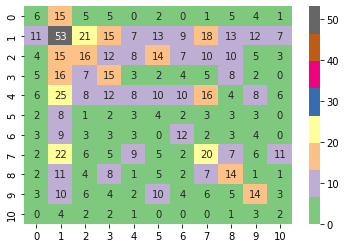

In [ ]:
train_pred = clf.predict(tfidf_X_train)
test_pred = clf.predict(tfidf_X_test)

print_metrics_evaluation(y_train, train_pred, model_name='Train Set', average='macro')
print_metrics_evaluation(y_test, test_pred, model_name='Test Set', average='macro')
plot_confusion_matrix(y_test, test_pred)

#### XGBoost:
XGBoost is a Desicion-Tree based model which benefits from ensembles and gradient boosting:

In [ ]:
import xgboost as xgb

In [ ]:
D_train = xgb.DMatrix(tfidf_X_train, label=y_train)
D_test = xgb.DMatrix(tfidf_X_test, label=y_test)

In [ ]:
step = 20

param = {
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': num_class
}

model = xgb.train(param, D_train, step)

Train Set:
accuracy_score = 0.4290987388495847
precision_score = 0.6636532776698513
recall_score = 0.32633134727017227
f1_score = 0.3895537243545472

Test Set:
accuracy_score = 0.27060270602706027
precision_score = 0.2821784902468437
recall_score = 0.17441582112500734
f1_score = 0.1809264007395968



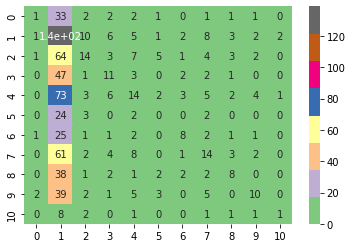

In [ ]:
train_preds = model.predict(D_train)
test_preds = model.predict(D_test)

print_metrics_evaluation(y_train, train_preds, model_name='Train Set', average='macro')
print_metrics_evaluation(y_test, test_preds, model_name='Test Set', average='macro')
plot_confusion_matrix(y_test, test_preds)

### Deep Neural Network models:

We need validation dataset for this part:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=23)

In [ ]:
tfidf_X_val = tfidf.transform(X_val).toarray()
tfidf_X_train = tfidf.transform(X_train).toarray()

#### Pytorch:
(Unfortunately this model gets poor f1 scores but we have kept it for showing our different models that we tried.)

Importing required libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm

from typing import Tuple
from torch.utils.data import Dataset, DataLoader

for using GPU if possible:

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Defining a simple Dataset class for our data used by pytorch models:

In [ ]:
class BoostanDataset(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)

    def __len__(self) -> int:
        return self.X.shape[0]

    def __getitem__(self, i: int) -> Tuple[torch.Tensor, ...]:
        return self.X[i], self.Y[i]

We define a simple neural network model consisting multiple Linear layers, ReLU activation functions and Dropout for preventing overfitting on training data.  

In [ ]:
class BoostanClassifier(nn.Module):

    def __init__(self, input_size, num_class, dropout=0.5):
        super().__init__()
        self.input_size = input_size
        self.num_class = num_class
        self.dropout = nn.Dropout(p=dropout)
        self.lnn = nn.Sequential(
            nn.Linear(self.input_size, 64),
            nn.ReLU(),
            self.dropout,
            nn.Linear(64, 32),
            nn.ReLU(),
            self.dropout,
            nn.Linear(32, num_class),
        )
        
    def forward(self, x: torch.tensor):
        x = x.view(-1, self.input_size)
        return self.lnn(x)

    def predict(self, x):
        return self.forward(x)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

feature_selector = SelectKBest(chi2, k=40)
train_X = feature_selector.fit_transform(tfidf_X_train, y_train)
val_X = feature_selector.transform(tfidf_X_val)
test_X = feature_selector.transform(tfidf_X_test)

In [ ]:
train_X.shape, val_X.shape, test_X.shape

((2080, 40), (520, 40), (813, 40))

Creating Dataset and Dataloader from our training and validation and test data:

In [ ]:
target = 'chapter'
batch_size = 32

train_set = BoostanDataset(train_X, y_train.to_numpy())
val_set = BoostanDataset(val_X, y_val.to_numpy())
test_set = BoostanDataset(test_X, y_test.to_numpy())

train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset=val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

Note how we used class weights in Loss funcion in order to get a better F1 score:

In [ ]:
# setting config:
model = BoostanClassifier(test_X.shape[1], num_class).to(device).double()
criterion = nn.CrossEntropyLoss().to(device)
lr=1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


Creating train and validate functions for more convenience.

In [ ]:
def train(model, criterion, optimizer, epoch):
    train_loss = 0
    N_train = len(train_loader.dataset)

    model.train()
    with tqdm.tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, y) in pbar:
            optimizer.zero_grad()

            x = x.to(device)
            y = y.to(device)
            p = model(x)
            
            loss = criterion(p, y)
            train_loss += loss.item() * len(x)

            pbar.set_description(f'Epoch:{epoch}, Train Loss: {train_loss / N_train:.3e}')
            
            loss.backward()
            optimizer.step()
    
    train_loss /= N_train
    return train_loss


def validate(model, criterion, epoch):
    val_loss = 0
    N_val = len(val_loader.dataset)

    model.eval()
    with torch.no_grad(), tqdm.tqdm(enumerate(val_loader), total=len(val_loader)) as pbar:
        for i, (x, y) in pbar:
            x = x.to(device)
            y = y.to(device)
            p = model(x)

            loss = criterion(p, y)
            val_loss += loss.item() * len(x)

            pbar.set_description(f'Epoch:{epoch}, Val Loss: {val_loss / N_val:.3e}')
    
    print('-------------------------------------------------------------------')
    val_loss /= N_val
    return val_loss

This function trains given pytorch model and returns the best result of training process, plots learning curves for train and validation sets and finally prints metrics' values.

In [ ]:
def do_expriment(model, optimizer, num_epochs, model_name):

    train_loss_arr, val_loss_arr = np.zeros(num_epochs), np.zeros(num_epochs)

    val_loss_min = float('inf')

    for epoch in range(num_epochs):
        train_loss = train(model, criterion, optimizer, epoch)
        val_loss = validate(model, criterion, epoch)

        train_loss_arr[epoch] = train_loss
        val_loss_arr[epoch] = val_loss

        if val_loss <= val_loss_min:
            torch.save(model.state_dict(), f'{model_name}.pt')
            val_loss_min = val_loss

    # load best model during different epochs
    # model.load_state_dict(torch.load(f'{model_name}.pt'))

    # metrics
    X_train, Y_train = train_loader.dataset[:]
    X_val, Y_val = val_loader.dataset[:]

    model = model.to('cpu')

    train_preds = model(X_train).argmax(dim=1)
    val_preds = model(X_val).argmax(dim=1)

    plt.plot(train_loss_arr, label='train')
    plt.plot(val_loss_arr, label='val')
    plt.legend();

    print_metrics_evaluation(Y_train.detach(), model(X_train).argmax(dim=1).detach(), f'{model_name}: Metrics on Training Data')
    print_metrics_evaluation(Y_val.detach(), model(X_val).argmax(dim=1).detach(), f'{model_name}: Metrics on Validation Data')

    model = model.to(device)

    return train_loss_arr, val_loss_arr, model

Epoch:0, Val Loss: 2.384e+00: 100%|██████████| 17/17 [00:00<00:00, 298.31it/s]


-------------------------------------------------------------------


Epoch:1, Val Loss: 2.378e+00: 100%|██████████| 17/17 [00:00<00:00, 328.31it/s]


-------------------------------------------------------------------


Epoch:2, Val Loss: 2.371e+00: 100%|██████████| 17/17 [00:00<00:00, 287.73it/s]


-------------------------------------------------------------------


Epoch:3, Val Loss: 2.363e+00: 100%|██████████| 17/17 [00:00<00:00, 358.28it/s]


-------------------------------------------------------------------


Epoch:4, Val Loss: 2.355e+00: 100%|██████████| 17/17 [00:00<00:00, 221.26it/s]


-------------------------------------------------------------------


Epoch:5, Val Loss: 2.347e+00: 100%|██████████| 17/17 [00:00<00:00, 321.97it/s]


-------------------------------------------------------------------


Epoch:6, Val Loss: 2.338e+00: 100%|██████████| 17/17 [00:00<00:00, 221.44it/s]


-------------------------------------------------------------------


Epoch:7, Val Loss: 2.330e+00: 100%|██████████| 17/17 [00:00<00:00, 280.68it/s]


-------------------------------------------------------------------


Epoch:8, Val Loss: 2.322e+00: 100%|██████████| 17/17 [00:00<00:00, 225.64it/s]


-------------------------------------------------------------------


Epoch:9, Val Loss: 2.314e+00: 100%|██████████| 17/17 [00:00<00:00, 232.18it/s]


-------------------------------------------------------------------


Epoch:10, Val Loss: 2.307e+00: 100%|██████████| 17/17 [00:00<00:00, 208.06it/s]


-------------------------------------------------------------------


Epoch:11, Val Loss: 2.299e+00: 100%|██████████| 17/17 [00:00<00:00, 250.76it/s]


-------------------------------------------------------------------


Epoch:12, Val Loss: 2.293e+00: 100%|██████████| 17/17 [00:00<00:00, 203.68it/s]


-------------------------------------------------------------------


Epoch:13, Val Loss: 2.288e+00: 100%|██████████| 17/17 [00:00<00:00, 230.63it/s]


-------------------------------------------------------------------


Epoch:14, Val Loss: 2.283e+00: 100%|██████████| 17/17 [00:00<00:00, 202.93it/s]


-------------------------------------------------------------------


Epoch:15, Val Loss: 2.279e+00: 100%|██████████| 17/17 [00:00<00:00, 239.80it/s]


-------------------------------------------------------------------


Epoch:16, Val Loss: 2.276e+00: 100%|██████████| 17/17 [00:00<00:00, 245.22it/s]


-------------------------------------------------------------------


Epoch:17, Val Loss: 2.273e+00: 100%|██████████| 17/17 [00:00<00:00, 222.15it/s]


-------------------------------------------------------------------


Epoch:18, Val Loss: 2.271e+00: 100%|██████████| 17/17 [00:00<00:00, 233.57it/s]


-------------------------------------------------------------------


Epoch:19, Val Loss: 2.270e+00: 100%|██████████| 17/17 [00:00<00:00, 278.41it/s]


-------------------------------------------------------------------


Epoch:20, Val Loss: 2.269e+00: 100%|██████████| 17/17 [00:00<00:00, 251.12it/s]


-------------------------------------------------------------------


Epoch:21, Val Loss: 2.268e+00: 100%|██████████| 17/17 [00:00<00:00, 214.27it/s]


-------------------------------------------------------------------


Epoch:22, Val Loss: 2.267e+00: 100%|██████████| 17/17 [00:00<00:00, 249.38it/s]


-------------------------------------------------------------------


Epoch:23, Val Loss: 2.267e+00: 100%|██████████| 17/17 [00:00<00:00, 205.67it/s]


-------------------------------------------------------------------


Epoch:24, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 229.96it/s]


-------------------------------------------------------------------


Epoch:25, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 230.25it/s]


-------------------------------------------------------------------


Epoch:26, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 200.94it/s]


-------------------------------------------------------------------


Epoch:27, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 215.70it/s]


-------------------------------------------------------------------


Epoch:28, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 209.66it/s]


-------------------------------------------------------------------


Epoch:29, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 237.08it/s]


-------------------------------------------------------------------


Epoch:30, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 249.30it/s]


-------------------------------------------------------------------


Epoch:31, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 233.84it/s]


-------------------------------------------------------------------


Epoch:32, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 240.68it/s]


-------------------------------------------------------------------


Epoch:33, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 202.13it/s]


-------------------------------------------------------------------


Epoch:34, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 204.10it/s]


-------------------------------------------------------------------


Epoch:35, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 220.14it/s]


-------------------------------------------------------------------


Epoch:36, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 219.37it/s]


-------------------------------------------------------------------


Epoch:37, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 199.93it/s]


-------------------------------------------------------------------


Epoch:38, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 216.95it/s]


-------------------------------------------------------------------


Epoch:39, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 216.16it/s]


-------------------------------------------------------------------


Epoch:40, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 245.55it/s]


-------------------------------------------------------------------


Epoch:41, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 228.29it/s]


-------------------------------------------------------------------


Epoch:42, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 199.26it/s]


-------------------------------------------------------------------


Epoch:43, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 214.21it/s]


-------------------------------------------------------------------


Epoch:44, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 241.71it/s]


-------------------------------------------------------------------


Epoch:45, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 218.98it/s]


-------------------------------------------------------------------


Epoch:46, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 217.64it/s]


-------------------------------------------------------------------


Epoch:47, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 242.58it/s]


-------------------------------------------------------------------


Epoch:48, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 207.90it/s]


-------------------------------------------------------------------


Epoch:49, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 328.06it/s]


-------------------------------------------------------------------


Epoch:50, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 293.17it/s]


-------------------------------------------------------------------


Epoch:51, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 229.39it/s]


-------------------------------------------------------------------


Epoch:52, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 336.01it/s]


-------------------------------------------------------------------


Epoch:53, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 234.60it/s]


-------------------------------------------------------------------


Epoch:54, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 299.33it/s]


-------------------------------------------------------------------


Epoch:55, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 297.26it/s]


-------------------------------------------------------------------


Epoch:56, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 381.78it/s]


-------------------------------------------------------------------


Epoch:57, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 279.16it/s]


-------------------------------------------------------------------


Epoch:58, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 271.91it/s]


-------------------------------------------------------------------


Epoch:59, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 245.45it/s]


-------------------------------------------------------------------


Epoch:60, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 215.72it/s]


-------------------------------------------------------------------


Epoch:61, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 224.93it/s]


-------------------------------------------------------------------


Epoch:62, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 215.34it/s]


-------------------------------------------------------------------


Epoch:63, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 244.28it/s]


-------------------------------------------------------------------


Epoch:64, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 208.68it/s]


-------------------------------------------------------------------


Epoch:65, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 207.85it/s]


-------------------------------------------------------------------


Epoch:66, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 228.88it/s]


-------------------------------------------------------------------


Epoch:67, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 211.97it/s]


-------------------------------------------------------------------


Epoch:68, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 217.68it/s]


-------------------------------------------------------------------


Epoch:69, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 206.45it/s]


-------------------------------------------------------------------


Epoch:70, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 217.49it/s]


-------------------------------------------------------------------


Epoch:71, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 236.79it/s]


-------------------------------------------------------------------


Epoch:72, Val Loss: 2.264e+00: 100%|██████████| 17/17 [00:00<00:00, 224.14it/s]


-------------------------------------------------------------------


Epoch:73, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 245.58it/s]


-------------------------------------------------------------------


Epoch:74, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 301.12it/s]


-------------------------------------------------------------------


Epoch:75, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 216.42it/s]


-------------------------------------------------------------------


Epoch:76, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 211.78it/s]


-------------------------------------------------------------------


Epoch:77, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 272.79it/s]


-------------------------------------------------------------------


Epoch:78, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 222.02it/s]


-------------------------------------------------------------------


Epoch:79, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 249.43it/s]


-------------------------------------------------------------------


Epoch:80, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 204.87it/s]


-------------------------------------------------------------------


Epoch:81, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 224.33it/s]


-------------------------------------------------------------------


Epoch:82, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 215.58it/s]


-------------------------------------------------------------------


Epoch:83, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 307.89it/s]


-------------------------------------------------------------------


Epoch:84, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 229.39it/s]


-------------------------------------------------------------------


Epoch:85, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 225.47it/s]


-------------------------------------------------------------------


Epoch:86, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 198.05it/s]


-------------------------------------------------------------------


Epoch:87, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 235.21it/s]


-------------------------------------------------------------------


Epoch:88, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 228.52it/s]


-------------------------------------------------------------------


Epoch:89, Val Loss: 2.265e+00: 100%|██████████| 17/17 [00:00<00:00, 214.47it/s]


-------------------------------------------------------------------


Epoch:90, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 227.91it/s]


-------------------------------------------------------------------


Epoch:91, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 205.10it/s]


-------------------------------------------------------------------


Epoch:92, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 228.70it/s]


-------------------------------------------------------------------


Epoch:93, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 214.45it/s]


-------------------------------------------------------------------


Epoch:94, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 386.14it/s]


-------------------------------------------------------------------


Epoch:95, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 243.09it/s]


-------------------------------------------------------------------


Epoch:96, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 249.89it/s]


-------------------------------------------------------------------


Epoch:97, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 303.27it/s]


-------------------------------------------------------------------


Epoch:98, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 348.78it/s]


-------------------------------------------------------------------


Epoch:99, Val Loss: 2.266e+00: 100%|██████████| 17/17 [00:00<00:00, 304.77it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------------------------------------------------------------------
PytorchModel: Metrics on Training Data:
accuracy_score = 0.22355769230769232
precision_score = 0.020323426573426576
recall_score = 0.09090909090909091
f1_score = 0.03322021789605287

PytorchModel: Metrics on Validation Data:
accuracy_score = 0.225
precision_score = 0.020454545454545454
recall_score = 0.09090909090909091
f1_score = 0.03339517625231911



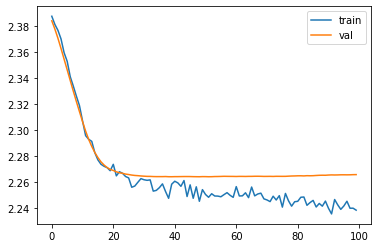

In [ ]:
train_loss_arr, val_loss_arr, model = do_expriment(model, optimizer, num_epochs=100, model_name='PytorchModel')

### Transformer based classifier

In [ ]:
from sklearn.model_selection import train_test_split

#split test-train data

x_train, x_test, y_train, y_test = train_test_split(data['poem'], data['chapter'], test_size=0.20, random_state=2)
#x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

install required modules

In [ ]:
!pip install -q transformers

Pre-processing without tokenizing documents.

In [ ]:
x_train_processed = pre_process(x_train, remove_stopwords=True, MIN_COUNT=0)
x_train_processed = [' '.join(x) for x in x_train_processed]

x_test_processed = pre_process(x_test, remove_stopwords=True, MIN_COUNT=0)
x_test_processed = [' '.join(x) for x in x_test_processed]

#x_valid_processed = pre_process(x_valid, remove_stopwords=True, MIN_COUNT=0)
#x_valid_processed = [' '.join(x) for x in x_valid_processed]

In [ ]:
from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor(class_weight, dtype=torch.float).to('cuda'))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

Use HooshvareLab(Parsbert) pretrained model to create a new classification model. Use cuda for faster runtime.

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch

MODEL_NAME = 'HooshvareLab/bert-fa-base-uncased'
classification_model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(data.chapter.value_counts()))

device = "cuda" if torch.cuda.is_available() else "cpu"
classification_model.to(device)

loading configuration file https://huggingface.co/HooshvareLab/bert-fa-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/58557026b49e9dc674e1f96085a408e0703f4b89cb4470fd9f1ef11ea21c18f9.8188588bbc324b118f288d3ce203479bf1b25266e7ce9fdc628195c43381c732
Model config BertConfig {
  "_name_or_path": "HooshvareLab/bert-fa-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LAB

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

Define tokenizer from same pretrained model.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/HooshvareLab/bert-fa-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/58557026b49e9dc674e1f96085a408e0703f4b89cb4470fd9f1ef11ea21c18f9.8188588bbc324b118f288d3ce203479bf1b25266e7ce9fdc628195c43381c732
Model config BertConfig {
  "_name_or_path": "HooshvareLab/bert-fa-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.0",
  "type_vocab_size": 2,
  "use_cache": true,

Creating datasets and use tokenizer to decode train, validation, and test data.

In [ ]:
import torch 

class PoemDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels, encoder):
        self.encoding = encoder(data, truncation=True, padding=True)
        self.labels = labels.to_numpy()
    
    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = PoemDataset(x_train_processed, y_train, tokenizer)
#valid_dataset = PoemDataset(x_valid_processed, y_valid, tokenizer)
test_dataset = PoemDataset(x_test_processed, y_test, tokenizer)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Setting training arguments for the model. use learning rate 1e-5 to avoid overfitting.

Then Train the model.

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs = 6,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    warmup_steps=32,
    load_best_model_at_end=True,
    metric_for_best_model='f1'
)

trainer = CustomTrainer(
    model=classification_model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3251
  Num Epochs = 6
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1224


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,2.280200,2.223201,0.157442,0.082341,0.076844,0.132433
2,2.096900,2.151747,0.214022,0.103306,0.092690,0.156377
3,1.978800,2.140031,0.226322,0.122131,0.129495,0.168243
4,1.872300,2.159621,0.253383,0.152920,0.184551,0.189012
5,1.655900,2.200909,0.217712,0.138098,0.151669,0.168629
6,1.599400,2.185274,0.232472,0.157222,0.197545,0.183692


***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to ./results/checkpoint-204
Configuration saved in ./results/checkpoint-204/config.json
Model weights saved in ./results/checkpoint-204/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-204/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-204/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

TrainOutput(global_step=1224, training_loss=1.9212358784831427, metrics={'train_runtime': 204.6603, 'train_samples_per_second': 95.309, 'train_steps_per_second': 5.981, 'total_flos': 160395592781376.0, 'train_loss': 1.9212358784831427, 'epoch': 6.0})

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs = 6,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    warmup_steps=32,
    load_best_model_at_end=True,
    metric_for_best_model='f1'
)

trainer = CustomTrainer(
    model=classification_model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3251
  Num Epochs = 6
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1224


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.359100,2.280938,0.221402,0.151026,0.212733,0.174074
2,1.091600,2.449702,0.247232,0.195395,0.204150,0.206179
3,0.916400,2.603694,0.253383,0.205210,0.231481,0.208431
4,0.993500,2.754789,0.242312,0.199726,0.206873,0.199824
5,0.677300,2.813376,0.230012,0.198381,0.208053,0.199115
6,0.686400,2.818444,0.234932,0.202941,0.210312,0.202634


***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to ./results/checkpoint-204
Configuration saved in ./results/checkpoint-204/config.json
Model weights saved in ./results/checkpoint-204/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-204/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-204/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

TrainOutput(global_step=1224, training_loss=0.9264850661255954, metrics={'train_runtime': 201.1416, 'train_samples_per_second': 96.976, 'train_steps_per_second': 6.085, 'total_flos': 160395592781376.0, 'train_loss': 0.9264850661255954, 'epoch': 6.0})

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs = 6,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    warmup_steps=32,
    load_best_model_at_end=True,
    metric_for_best_model='f1'
)

trainer = CustomTrainer(
    model=classification_model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3251
  Num Epochs = 6
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1224


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.477500,2.880664,0.237392,0.194874,0.299030,0.193206
2,0.338900,3.007650,0.238622,0.212259,0.252080,0.218344
3,0.346800,3.371300,0.239852,0.206581,0.258301,0.203840
4,0.400000,3.425286,0.233702,0.208395,0.242662,0.211880
5,0.313200,3.471857,0.231242,0.201589,0.234741,0.203553
6,0.301800,3.458084,0.234932,0.208479,0.234084,0.206933


***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-204
Configuration saved in ./results/checkpoint-204/config.json
Model weights saved in ./results/checkpoint-204/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-204/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-204/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-408
Configuration saved in ./results/checkpoint-408/config.json
Model weights saved in ./results/checkpoint-408/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-408/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-408/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 813
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-612
Configuration saved in ./results/checkpoint-612/config.json
Model weig

TrainOutput(global_step=1224, training_loss=0.34638017191995985, metrics={'train_runtime': 199.9395, 'train_samples_per_second': 97.56, 'train_steps_per_second': 6.122, 'total_flos': 160395592781376.0, 'train_loss': 0.34638017191995985, 'epoch': 6.0})

predict test data and evaluate the model and plot confusion matrix:

In [ ]:
pred = trainer.predict(test_dataset)
pred_y = pred.predictions.argmax(-1)

***** Running Prediction *****
  Num examples = 813
  Batch size = 16


Transformer Based:
accuracy_score = 0.23862238622386223
precision_score = 0.25207985308204073
recall_score = 0.2183442700227179
f1_score = 0.21225878877389573



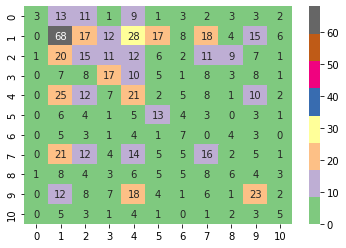

In [ ]:
print_metrics_evaluation(y_test, pred_y, 'Transformer Based')
plot_confusion_matrix(y_test, pred_y)

# Phase 3: Link Anylysis

In [109]:
# data = pd.concat([boostan_data, golestan_data], ignore_index=True).drop(columns = ['section', 'chapter'])
# it seems to work better on boostan only
data = boostan_data.drop(columns = ['section', 'chapter'])
data.head()

,poem
0,به نام خداوندِ جان‌آفرین\nحکیمِ سخن‌درزبان‌آفرین
1,خداوند بخشندهٔ دستگیر\nکریم خطابخش پوزش‌پذیر
2,عزیزی که هر کز درش سر بتافت\nبه هر در که شد هی...
3,سر پادشاهان گردن‌فراز\nبه درگاه او بر زمین نیاز
4,نه گردن‌کشان را بگیرد به فور\nنه عذرآوران را ب...


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer= lambda x: sent_pre_process(x, remove_stopwords=True))
tfidf_data = tfidf.fit_transform(data.poem.to_numpy())
tfidf_data = tfidf_data.toarray()
tfidf_data.shape

(4064, 6893)

In [111]:
similarity_matrix = np.matmul(tfidf_data, tfidf_data.T)
similarity_matrix.shape

(4064, 4064)

In [26]:
threshold = 0.3

adj_matrix = (similarity_matrix > threshold).astype(int)
# do we need this?
adj_matrix -= np.eye(len(adj_matrix), dtype=int)
print(f'Number of links: {adj_matrix.sum()}')

Number of links: 4366


In [27]:
import networkx as nx
adj_graph = nx.from_numpy_array(adj_matrix)
probabilities = nx.pagerank(adj_graph)

In [28]:
max_idx = sorted(probabilities, key=probabilities.get, reverse=True)
probabilities[max_idx[0]]

0.003827895757140323

In [29]:
for poem in data.poem[max_idx[0: 5]]:
    print(poem)
    print()

به نرمی ز دشمن توان کرد دوست
چو با دوست سختی کنی دشمن اوست

که چشم از تو دارند مردم بسی
نه تو چشم داری به دست کسی

به روی من این در کسی کرد باز
که کردی تو بر روی وی در، فراز

یکی فتنه دید از طرف بر شکست
یکی در میان آمد و سر شکست

اگر هست مرد از هنر بهره‌ور
هنر خود بگوید نه صاحب هنر



<div dir='rtl'> 
<font face="B Nazanin">

تحلیل خروجی:
<br/>
ابتدا با ضرب ماتریس tfidfها در یک دیگر و به دست آوردن
ضرب داخلی سطرهای مختلف در هم، بر اساس بزرگ‌تر یا کوچک‌تر بودن شباهت نسبت به ترشهولد، ماتریس مجاورت را ایجاد کردیم.
<br/>
برای انتخاب ترشهولد مناسب، آن را به گونه‌ای تغییر دادیم که تعداد لینک‌هایی که بین ابیات مختلف وجود دارد، از اردر تعداد ابیات بوستان باشد.
در این صورت نه تعداد لینک‌ها بسیار زیاد است که احتمال‌ها خیلی نزدیک به یکدیگر شود و نه آن قدر کم است که امکان جابجا شدن از برخی ابیات وجود نداشته باشد.
<br/>
شعری که بیشترین احتمال را در الگوریتم
pagerank
دریافت می‌کند بیت 
«به نرمی ز دشمن توان کرد دوست / چو با دوست سختی کنی دشمن اوست»
است که یکی از پرتکرارترین مضامین موجود در بوستان سعدی است. که مضمون اصلی آن این است در هر کاری محبت و دوستی بسیار کارسازتر است از جنگ و دشمنی. و انسان خوب نباید حتی در برخورد با انسان‌های بد و دشمنانش نیز راه و رسم خود را کنار بگذارد و به بدی روی بیاورد. و با این کار حتی ممکن است دشمنان نیز دست از بدی کردن بکشند.
<br/>
با کمی جستجو در بوستان ابیات مشابه زیادی همچون این بیت می‌توانیم بیابیم:
<br/>
«همی تا برآید به تدبیر کار / مدارای دشمن به از کارزار»
<br/>
«چو کاری براید به لطف و خوشی / چه حاجت به تندی و گردنکشی»
<br/>
«گرت طبع من آمد ناسزاوار / تو خوی نیک خویش از دست مگذار»
<br/>
حتی در سعدی ابیات دیگری نیز دارد که در آن‌ها بیان می‌کند لطف و خشم هر یک به جای خود مناسب هستند و یا ابیاتی که بیان می‌کند باید با بدان به مانند خودشان بد بود (اغلب علت این ابیاتی که ممکن است جداگانه متناقض به نظر برسند این است که معمولا در یک حکایت افراد مختلف نظرات مختلفی درباره‌ی این موضوع بیان کرده‌اند). که این گونه ابیات نیز ارتباط تنگاتنگی با ابیات بالا دارند و با آن‌ها لینک می‌شوند. مانند ابیات زیر:
<br/>
«هر که را دشمن پیش است گر دکشد دشمن خویش است»
<br/>
«چو با سفله گویی به لطف و خوشی / فزون گرددش کبر و گردن کشی»
<br/>
«بگفتا نیک‌مردی کن نه چندان / که گردد خیره گرگ تیزدندان»
<br/>
«ترحم بر پلنگ تیزدندان / سمتمکاری بود بر گوسپندان»
<br/>
«درشتی و نرمی به‌هم‌در به است / جو رگ‌زن که جراح و مرهم‌نه است»
<br/>
«مبخشای بر هر کجا ظالمی‌ست / که رحمت بر او جور بر عالمی‌ست»
<br/>
«هر آن کس که بر دزد رحمت کند / به بازوی خود کاروان می‌زند»
<br/>
«جفاپیشگان را بده سر به باد / ستم بر ستم‌پیشه عدل است و داد»
<br/>
پس طبیعی است که این مضامین مرتبط و پرتکرار، ابیاتشان با هم لینک شود و 
random walker
ما با احتمال بیشتری در یکی از آن‌ها قرار بگیرد.

</div>

We use NetworkX HTIS algorithm to estimate hubs and authority of nodes.

In [30]:
hubs, authority = nx.hits(adj_graph)

First we sort nodes based on their hubs and then print the 5 nodes with the most hubs.

In [31]:
#  Based on hubs

max_idx = list(sorted(hubs, key=hubs.get, reverse=True))
hubs[max_idx[0]]

0.08391799304174069

In [32]:
for poem in data.poem[max_idx[0:5]]:
    print(poem)
    print()

به نرمی ز دشمن توان کرد دوست
چو با دوست سختی کنی دشمن اوست

بود دشمنش تازه و دوست ریش
کسی کش بود دشمن از دوست بیش

چو دشمن به دشمن بود مشتغل
تو با دوست بنشین به آرام دل

بر این گفتم آن دوست دشمن گرفت
چو آتش شد از خشم و در من گرفت

مگر پیش دشمن بگویند و دوست
که این کشته دست و شمشیر اوست



Then we do the same thing based on authority to check if results are diffrent.

In [33]:
#  Based on authority

max_idx = list(sorted(authority, key=authority.get, reverse=True))
authority[max_idx[0]]

0.08391799304174068

In [34]:
for poem in data.poem[max_idx[0:5]]:
    print(poem)
    print()

به نرمی ز دشمن توان کرد دوست
چو با دوست سختی کنی دشمن اوست

بود دشمنش تازه و دوست ریش
کسی کش بود دشمن از دوست بیش

چو دشمن به دشمن بود مشتغل
تو با دوست بنشین به آرام دل

بر این گفتم آن دوست دشمن گرفت
چو آتش شد از خشم و در من گرفت

مگر پیش دشمن بگویند و دوست
که این کشته دست و شمشیر اوست




<div dir=rtl>
<font face="B Nazanin">

همانطور که میتوانسیتم انتظار آن را داشته باشیم نتایج حاصل شده توسط 
authority و hubs
با یکدیگر تفاوت ندارند چرا که گراف ساخته شده براساس شباهت‌ها دو طرفه است و به عبارتی ماتریس مجاورت آن متقارن می‌باشد. همینطور می‌توانیم ببینیم که در اینجا هم بیتی که بیشترین ارزش را دارد همان بیت «به نرم ز دشمن توان کرد دوست، چو با دوست سختی کنی دشمن اوست» می‌باشد. که در این‌جا به این معنیست که بیشترین مقدار یال‌ها به این راس می‌رسد و به نظر می‌رسد که مفهوم محبت و دوستی در ابیات سعدی بسیار به چشم می‌خورد و برجسته است.

</div>

## Transformer based

Using our phase one transformer model we create embedded vector of every poems.

In [98]:
transformer_model = my_transformer(boostan_data['poem'])
transformer_vector = transformer_model.vectors

Some weights of the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.p

Then we normalize vectors and create similarity matrix and after that do the same process as tf-idf vectors.

In [99]:
for i in range(len(transformer_vector)):
    transformer_vector[i] = transformer_vector[i] / np.linalg.norm(transformer_vector[i]) 

In [100]:
similarity_matrix_transformer = np.matmul(transformer_vector, transformer_vector.T)
similarity_matrix_transformer.shape

(4064, 4064)

In [101]:
threshold = 0.69

adj_matrix_transformer = (similarity_matrix_transformer > threshold).astype(int)
# do we need this?
adj_matrix_transformer -= np.eye(len(adj_matrix_transformer), dtype=int)
print(f'Number of links: {adj_matrix_transformer.sum()}')

Number of links: 355270


In [102]:
import networkx as nx
adj_graph_transformer = nx.from_numpy_array(adj_matrix_transformer)
probabilities = nx.pagerank(adj_graph_transformer)

In [103]:
max_idx = sorted(probabilities, key=probabilities.get, reverse=True)
probabilities[max_idx[0]]

0.002116671097428274

In [104]:
for poem in data.poem[max_idx[0:5]]:
    print(poem)
    print()

زبان آمد از بهر شکر و سپاس
به غیبت نگرداندش حق شناس

زبان در نهندش به ایذا چو تیغ
که بدبخت زر دارد از خود دریغ

یکی شکر گفت اندران خاک و دود
که دکان ما را گزندی نبود

نیوشنده شد زین سخن تنگدل
به فکرت فرو رفت چون خر به گل

به پای بت اندر به امید خیر
بغلطید بیچاره بر خاک دیر



In [105]:
hubs, authority = nx.hits(adj_graph_transformer)

In [106]:
max_idx = list(sorted(hubs, key=hubs.get, reverse=True))
hubs[max_idx[0]]

0.0023943399138527713

In [107]:
for poem in data.poem[max_idx[0:5]]:
    print(poem)
    print()

به پای بت اندر به امید خیر
بغلطید بیچاره بر خاک دیر

یکی شکر گفت اندران خاک و دود
که دکان ما را گزندی نبود

زبان آمد از بهر شکر و سپاس
به غیبت نگرداندش حق شناس

زبان در نهندش به ایذا چو تیغ
که بدبخت زر دارد از خود دریغ

نیوشنده شد زین سخن تنگدل
به فکرت فرو رفت چون خر به گل




<div dir=rtl>
<font face="B Nazanin">

نتایج حاصل شده از روش HITS 
و 
PageRank
تفاوت چندانی با یکدیگر ندارند و می‌توانیم ببینیم که در روش PageRank
مفهوم «غیبت نکردن» را مفهموم برجسته‌ای در نظر گرفته است. که البته می‌توان دید که با ابیات دیگری که به ارزش زیادی برای آن تشخیص داده است شباهت زیادی نداشته است. در کل روش tf-idf
روش موثرتری برای ساختن ماتریس شباهت‌ها به نظر می‌آید. 

</div>